In [ ]:
notebook7_url = "http://localhost:8888/tree?token=test-token"
default_result_path = None
close_on_fail = False
transition_timeout = 10000
default_delay = None

In [2]:
import tempfile

work_dir = tempfile.mkdtemp()
if default_result_path is None:
    default_result_path = work_dir
work_dir

'/var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmp1ksmlzwh'

# nbsearch E2E Test - Cell Search on Notebook 7

- Test data to prepare: Test notebooks should be indexed in Solr
- Tests Cell Search using %%nbsearch magic command on Notebook 7 interface

In [ ]:
import asyncio
import importlib

import scripts.playwright
importlib.reload(scripts.playwright)

from scripts.playwright import *

await init_pw_context(close_on_fail=close_on_fail, last_path=default_result_path, delay=default_delay)

## Open Notebook 7 and create new notebook

Start epoch: 1761017117.406673 seconds


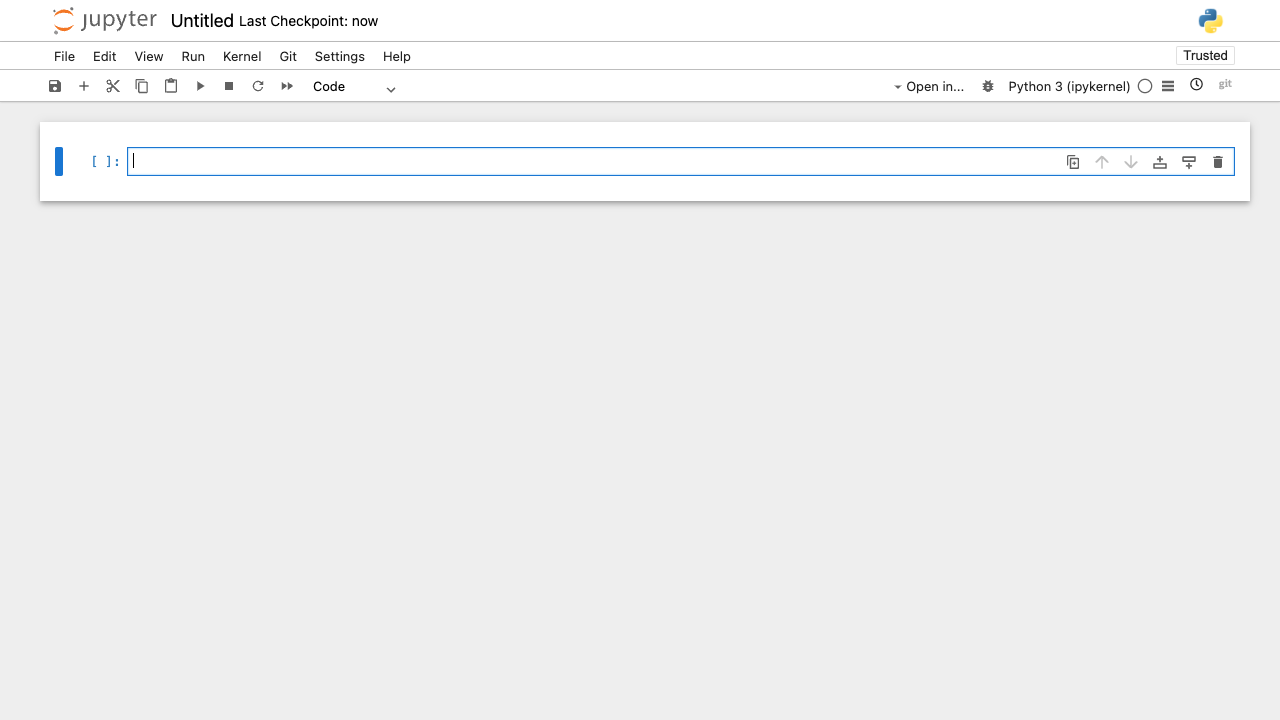

In [7]:
notebook_page = None

async def _step(page):
    await page.goto(notebook7_url)

    # Wait for Notebook 7 file browser to load
    await expect(page.locator('//*[@data-icon="nbsearch::notebooksearch"]')).to_be_visible(timeout=transition_timeout)
    
    # Wait for popup to open when creating a new notebook
    popup_future = page.wait_for_event('popup')
    
    # Click "New" dropdown button
    await page.locator('//div[contains(@class, "lm-MenuBar-itemLabel") and text()="New"]').click()
    
    # Click "Python 3 (ipykernel)" to create new notebook
    await page.locator('//div[contains(@class, "lm-Menu-itemLabel") and text()="Python 3 (ipykernel)"]').click()

    # Wait for popup to open
    popup = await popup_future
    
    # Wait for notebook to be ready
    await expect(popup.locator('.jp-Cell')).to_be_visible(timeout=transition_timeout)
    
    global notebook_page
    notebook_page = popup
    return popup

await run_pw(_step)

## Load nbsearch magic extension

Start epoch: 1761017153.792059 seconds


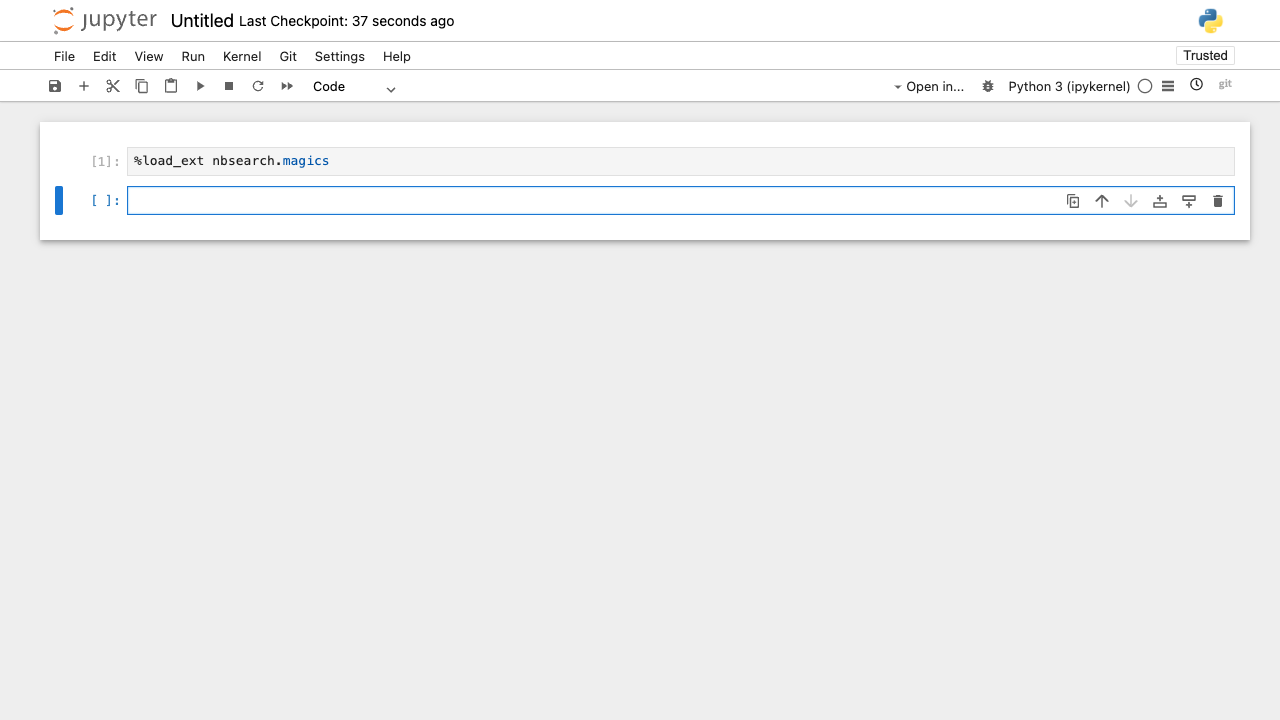

In [8]:
async def _step(page):
    # Type %load_ext nbsearch.magics in the first cell
    cell = page.locator('.jp-Cell-inputArea .cm-content').first
    await cell.click()
    await cell.type('%load_ext nbsearch.magics')
    
    # Execute the cell (Shift+Enter)
    await page.keyboard.press('Shift+Enter')
    
    # Wait for cell execution to complete
    await page.wait_for_timeout(2000)

await run_pw(_step)

## Execute %%nbsearch magic command

Start epoch: 1761017156.052396 seconds


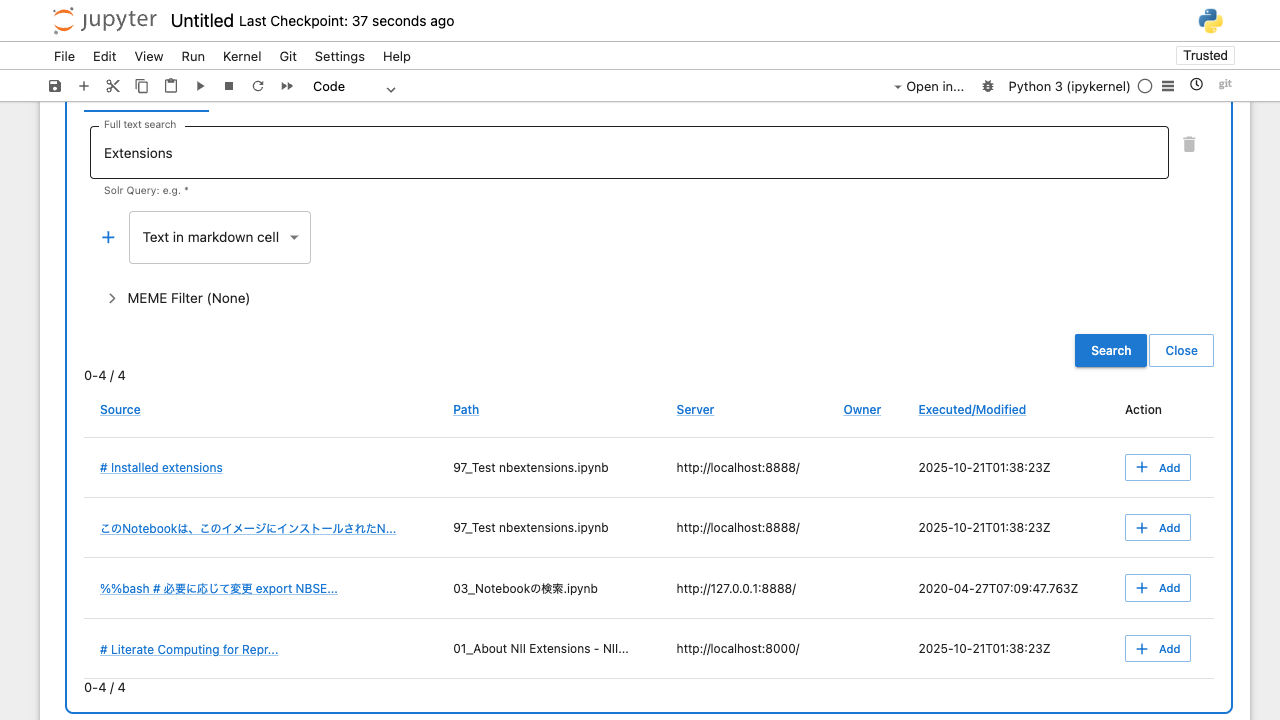

In [ ]:
async def _step(page):
    # The second cell should be selected automatically after Shift+Enter
    # Type %%nbsearch magic command with a simple query
    cell = page.locator('.jp-Cell.jp-mod-selected .cm-content')
    await cell.type('%%nbsearch\nExtensions')
    
    # Execute the cell
    await page.keyboard.press('Shift+Enter')
    await asyncio.sleep(0.5)
    
    # Wait for magic search widget to appear in the cell output
    await page.locator('.nbsearch-magic-root').scroll_into_view_if_needed()
    await expect(page.locator('.nbsearch-magic-root').locator('//*[contains(text(), "Add")]').first).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## Click "Add" button in the search results and click "Containing section" option

Start epoch: 1761017156.6396642 seconds


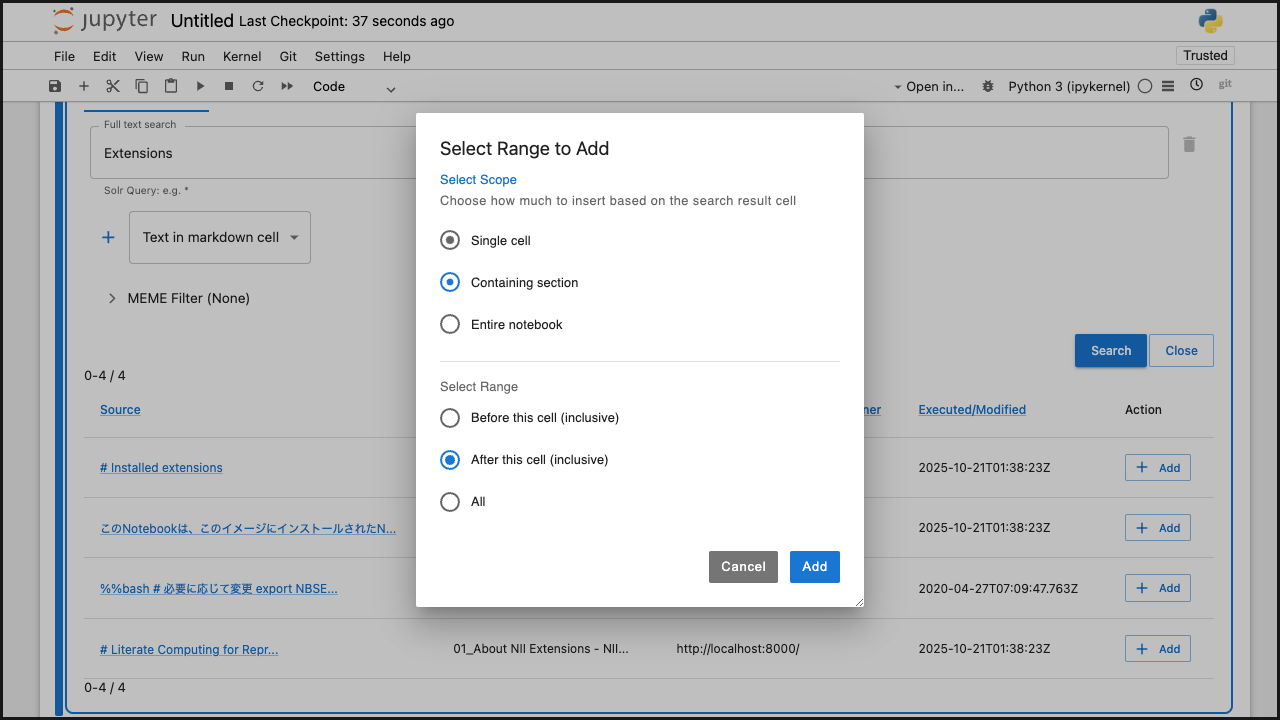

In [ ]:
async def _step(page):
    await page.locator('.nbsearch-magic-root').locator('//*[contains(text(), "Add")]').first.click()
    await asyncio.sleep(0.2)

    # Click the "Containing section" label
    await page.locator('//*[text()="Containing section"]').click()
    await asyncio.sleep(0.2)

    # Verify the "Select Range" options appear
    await expect(page.locator('//*[text()="Select Range"]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## Click "Add" button and verify the cells are added

Start epoch: 1761017157.620558 seconds


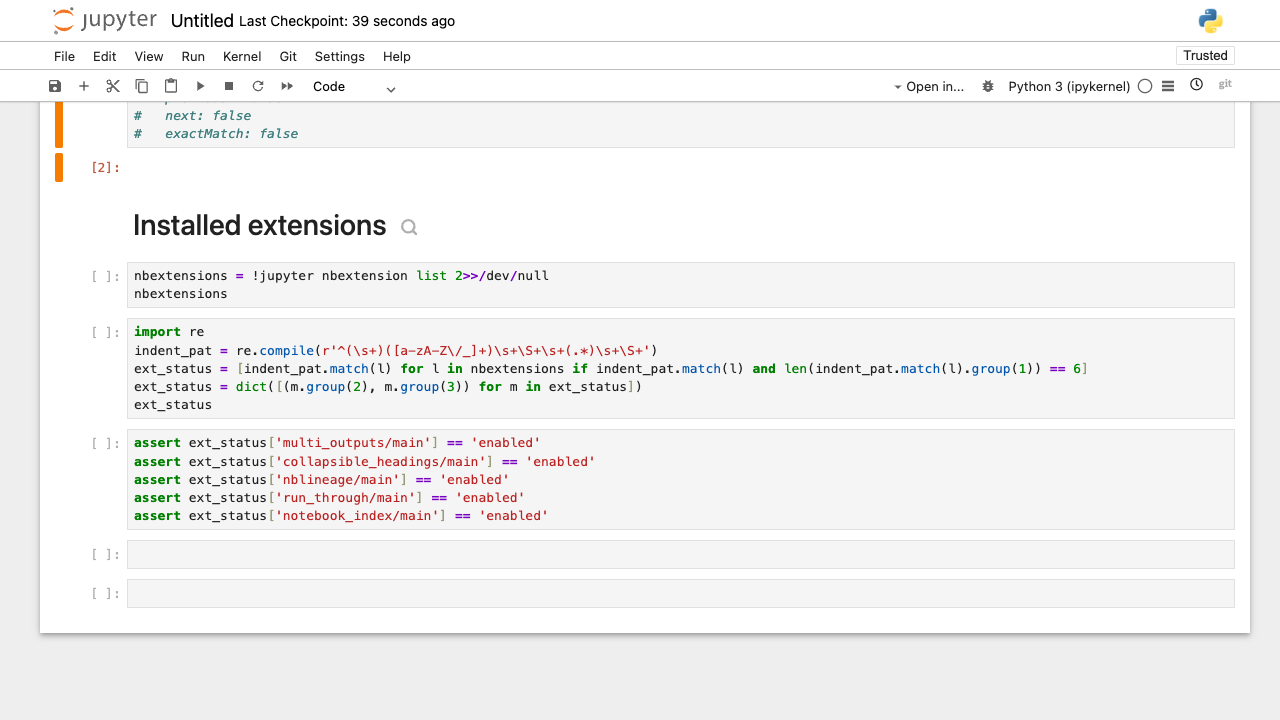

In [11]:
async def _step(page):
    # Count the number of cells before insertion
    cells = page.locator('.jp-Cell')
    initial_cell_count = await cells.count()

    # Click <div class="jp-Dialog-buttonLabel" title="" aria-label="Add">Add</div>
    await page.locator('//div[@class="jp-Dialog-buttonLabel" and text()="Add"]').click()

    # Verify that new cells are added
    await expect(page.locator('.jp-Cell')).not_to_have_count(initial_cell_count, timeout=transition_timeout)

    after_cell_count = await cells.count()
    assert after_cell_count > initial_cell_count, "No new cells were added."    

await run_pw(_step)

## Clean up

In [12]:
await finish_pw_context()

Video: /var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmp1ksmlzwh/video-1.webm
Video: /var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmp1ksmlzwh/video-2.webm
HAR: /var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmp1ksmlzwh/har.zip


スクリーンキャプチャ動画の取得に失敗しました。
Traceback (most recent call last):
  File "/Users/yazawa/workspace/nii-cloud/nbsearch/ui-tests/e2e-notebook/notebooks/scripts/playwright.py", line 202, in _finish_pw_context
    shutil.copyfile(video_path, dest_video_path)
  File "/Users/yazawa/.pyenv/versions/3.11.5/lib/python3.11/shutil.py", line 256, in copyfile
    with open(src, 'rb') as fsrc:
         ^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: '/var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmp677np7ck/videos/81ea422c5ca0147e32029b849792d528.webm'
スクリーンキャプチャ動画の取得に失敗しました。
Traceback (most recent call last):
  File "/Users/yazawa/workspace/nii-cloud/nbsearch/ui-tests/e2e-notebook/notebooks/scripts/playwright.py", line 202, in _finish_pw_context
    shutil.copyfile(video_path, dest_video_path)
  File "/Users/yazawa/.pyenv/versions/3.11.5/lib/python3.11/shutil.py", line 256, in copyfile
    with open(src, 'rb') as fsrc:
         ^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such

In [13]:
!rm -fr {work_dir}